In [111]:
import pandas as pd
import numpy as np

# Data viz
import matplotlib.pyplot as plt
import seaborn as sns

# To decompose a time series
import statsmodels.api as sm

# To create ACF & PACF plots
from statsmodels.graphics import tsaplots

# Module to build AR, MA, ARMA, ARIMA models
from statsmodels.tsa.arima.model import ARIMA

# Performance Evaluation
from sklearn.metrics import mean_squared_error

# To avoid warnings
import warnings
warnings.filterwarnings("ignore")

from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
from pmdarima import auto_arima

# Importing ADF test from statsmodel
from statsmodels.tsa.stattools import adfuller

import statsmodels
statsmodels.__version__


'0.13.5'

### Loading the Dataset

In [2]:
stores=pd.read_csv('stores.csv')
features=pd.read_csv('features/features.csv')
train=pd.read_csv('train/train.csv')
test=pd.read_csv('test/test.csv')

In [3]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [4]:
stores.dtypes

Store     int64
Type     object
Size      int64
dtype: object

In [5]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
features.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

As we can see above, Date is stored as object in features. Hence, converting Date column into datetime oject 

In [7]:
features['Date']=pd.to_datetime(features['Date'])
features.dtypes

Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                 bool
dtype: object

In [8]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [9]:
train.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [12]:
train['Date']=pd.to_datetime(train['Date'])

## Merging 3 datasets -stores, features and train

In [14]:
df=stores.merge(features, on=['Store'],how='inner').merge(train,on=['Store','Date'],how='inner')

In [15]:
df.head()

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y
0,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,False
1,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,False
2,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,False
3,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,False
4,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,False


In [16]:
df.drop(['IsHoliday_y'],inplace=True,axis=1)
df.shape

(421570, 16)

In [17]:
# Rename the column IsHoliday
df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True)

In [18]:
df.head()

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50
1,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27
2,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12
3,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04
4,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38


# Exploratory Data Analysis

In [19]:
# Total number of unique stores
df['Store'].nunique()

45

In [20]:
# Total number of unique departments
df['Dept'].nunique()

81

Size() includes null values, and returns the number of records in that group. Size returns a series

In [21]:
# Unique Combinations of Store and Department
df.groupby(['Dept','Store']).size()

Dept  Store
1     1        143
      2        143
      3        143
      4        143
      5        143
              ... 
99    39        41
      40        36
      41        43
      43         4
      44         2
Length: 3331, dtype: int64

On the other hand, count() does not include NaN values, and returns count of not null values for each column in data frame, hence returns a dataframe.

In [22]:
df.groupby(['Dept','Store']).count()

Type  Size  Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
Dept Store                                                                    
1    1       143   143   143          143         143         51         42   
     2       143   143   143          143         143         51         42   
     3       143   143   143          143         143         51         39   
     4       143   143   143          143         143         51         43   
     5       143   143   143          143         143         51         37   
...          ...   ...   ...          ...         ...        ...        ...   
99   39       41    41    41           41          41         26         21   
     40       36    36    36           36          36         28         20   
     41       43    43    43           43          43         34         27   
     43        4     4     4            4           4          3          2   
     44        2     2     2            2           2          0          0   

            MarkDown3  MarkDown4  MarkDown5  CPI  Unemployment  IsHoliday  \
Dept Store                                                                  
1    1             50         51         51  143           143        143   
     2             50         51         51  143           143        143   
     3             44         49         51  143           143        143   
     4             49         50         51  143           143        143   
     5             43         49         51  143           143        143   
...               ...        ...        ...  ...           ...        ...   
99   39            26         26         26   41            41         41   
     40            27         28         28   36            36         36   
     41            34         34         34   43            43         43   
     43             3          0          3    4             4          4   
     44             0          0          0    2             2          2   

            Weekly_Sales  
Dept Store                
1    1               143  
     2               143  
     3               143  
     4               143  
     5               143  
...                  ...  
99   39               41  
     40               36  
     41               43  
     43                4  
     44                2  

[3331 rows x 14 columns]

In [23]:
df['Weekly_Sales'].describe()

count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64

In [24]:
df[df.Weekly_Sales<=0]['Weekly_Sales']

188      -863.00
406      -698.00
2549      -58.00
3632      -50.00
4132        0.00
           ...  
420066     -4.97
420403    -34.00
420736     -1.91
421007      0.00
421142     -6.83
Name: Weekly_Sales, Length: 1358, dtype: float64

In [25]:
count=(df[df.Weekly_Sales<=0]['Weekly_Sales'].count()/df.shape[0])*100
np.round(count,2)

0.32

+ Observation 1 : For the following weeks, the sales is negative. 
+ Insight 1: It means that in these weeks, you had to credit the customers more than what you sold in that week. Such a scenario can occur when you had to accept a return order from customer and given them back the return money.


+ Observation 2 : For a couple of weeks the sales was 0
+ Insight 2: This can happen when no item  was sold throughout the week, or the amount of sales in this week was equal to the amount spent in returning credits to customers who returned a purchase product

Practically speaking, negative or 0 sales are highly unexpected for a a big chain of supermarket like Walmart. This can be an issue of Data reporting error. Further confirmation/ data analysis into the transactions of these corresponding week, can give a clarity and wisdom to either consider these records or drop them in our analysis. Here, considering these are data reporting errors, we drop them since they contribute to only 0.32 % of the data

In [26]:
df=df[df['Weekly_Sales']>0]

In [27]:
# Using Pivot table to observe mean sales across all stores and departments
store_dept_sales=pd.pivot_table(df,index='Dept',columns='Store',values='Weekly_Sales',aggfunc=np.mean)

In [28]:
store_dept_sales

Store,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
Dept,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,30777.980769,7328.621049,36979.940070,9774.553077,23867.553776,9542.801259,14789.827343,11846.558252,39925.138951,...,2239.227413,11024.235874,6923.538531,21925.021189,18794.578811,23205.259930,10375.148392,7549.109021,8049.992308,17745.916014
2,46102.090420,65912.922517,16841.775664,93639.315385,12317.953287,50269.437273,22603.690769,35729.821748,24969.477413,109795.291469,...,13416.025664,16511.446224,10986.172657,67338.429371,26702.705175,48349.828951,15976.902448,20722.851469,9377.273007,35800.912448
3,13150.478042,17476.563357,5509.300769,19012.491678,4101.085175,16806.638811,8633.536923,10683.305105,7497.356783,32086.181469,...,381.324266,1297.862028,498.700210,20569.701608,6489.030350,17021.833357,814.451189,999.648881,571.016713,9508.014965
4,36964.154476,45607.666573,8434.186503,56603.400140,9860.806783,34187.366503,14950.518601,21089.309301,17165.947762,48579.826364,...,9873.505105,17614.013636,10669.501329,44807.515105,24386.750559,30538.574895,14885.264755,18227.382168,7403.959580,24229.873147
5,24257.941119,30555.315315,11695.366573,45668.406783,6699.202238,34465.307622,13860.350490,19838.849231,19282.746014,58373.460280,...,314.753982,1137.631189,397.418322,24043.436783,17689.671678,25513.943776,1052.296783,575.417326,960.670490,16107.063077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,120772.062168,143588.751888,15745.528252,147236.473706,19340.693986,89208.786294,34208.097273,62951.463706,29575.050769,73344.654685,...,39735.688741,51410.551119,41793.649021,103036.757133,66572.881259,88666.468392,61205.272308,72883.223287,31100.185175,52896.166643
96,33251.831639,34319.063846,3934.540000,38346.573077,5985.671119,30450.542238,1123.383217,16.986667,3596.107762,11079.676643,...,15683.341818,20375.380769,11981.676643,27089.158601,15309.077972,2883.492238,15183.474196,25058.369371,2834.139580,2.970000
97,35207.348811,40697.204056,343.437357,39339.238951,667.070315,20637.667063,4374.927902,16978.366503,420.477500,5323.506503,...,6469.273636,13960.701399,9902.368182,23993.406853,17131.033497,19789.219231,17495.198811,19349.989930,6636.467413,6466.961888


Text(0.5, 1.0, 'Average Weekly Sales across each Department and Store')

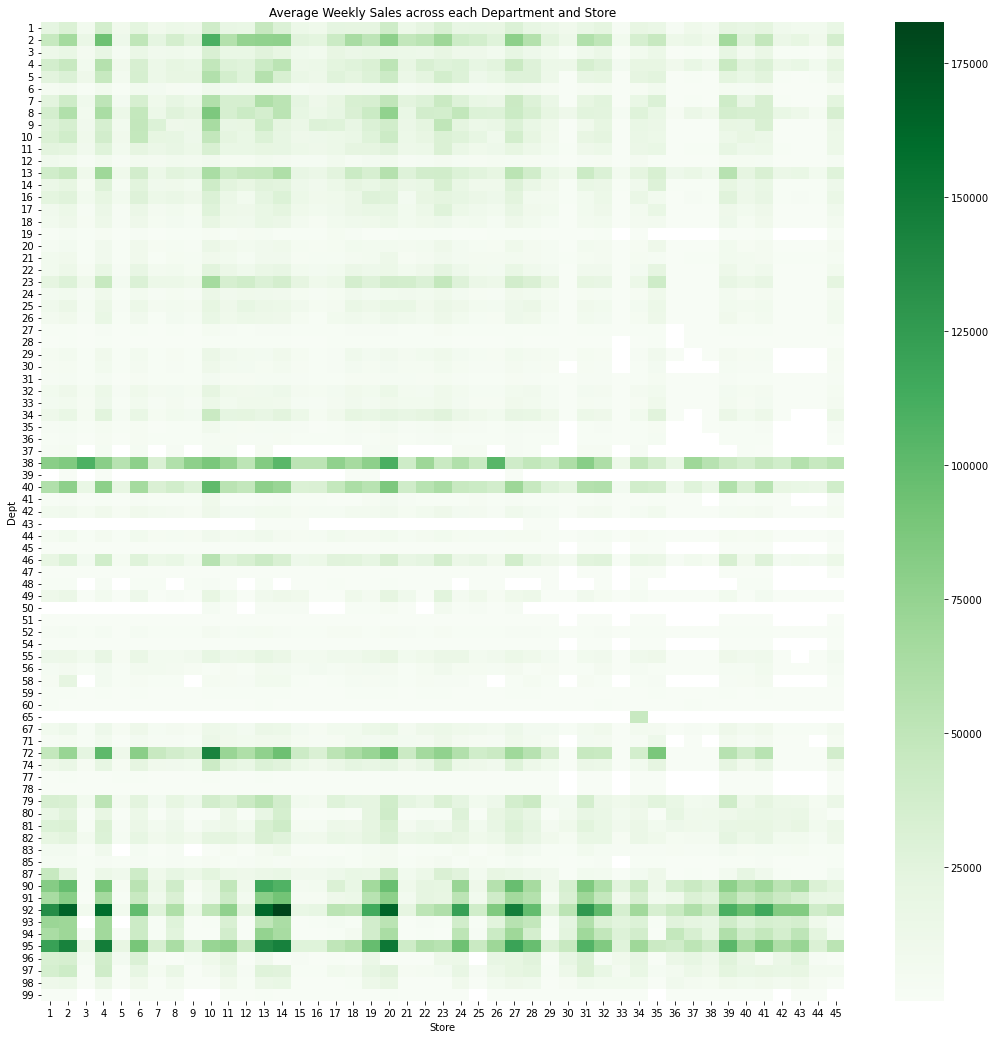

In [29]:
plt.figure(figsize=(18,18))
sns.heatmap(store_dept_sales,cmap='Greens')
plt.title('Average Weekly Sales across each Department and Store')

Observation & Insights

+ Obs: Department numbers 2,38,40,72,90,91,92,95 have high average weekly sales for most of the stores
+ Insight: These departments must be representing daily selling items such as grocery items, milk, fruits, toiletaries, etc. It is important to keep items in these departments in stock for all the stores.


+ Obs: In store 2,department 92 and 95 contain items providing high sales. There are many such store-department combinations
+ Insight: There can be 2 reasons of high weekly sales in such stores and departments. Either they contain items with small profit margin, but many such items are sold, leading to high sales. Or these departments contain items with high profit margin being sold every week. Moreover, sales across each store can also be influenced highly by the geographical location of the store

### Preparing the dataset for Time Series Models ( AR,MA,ARMA, ARIMA)

For statistical forecasting models like Auto Regressive model, Moving Average, Auto Regressive Moving Average Model, and so on, we require only sale period and sales amount

In [39]:
weekly_sales=df[['Date','Weekly_Sales']]
weekly_sales.set_index('Date',inplace=True)

In [40]:
weekly_sales

,Weekly_Sales
Date,
2010-02-05,24924.50
2010-02-05,50605.27
2010-02-05,13740.12
2010-02-05,39954.04
2010-02-05,32229.38
...,...
2012-10-26,2487.80
2012-10-26,5203.31
2012-10-26,56017.47


### Visualizing the time series & decomposing it

In [41]:
def plot_time_series(df,title):
    ax= df.plot(color='blue',figsize=(18,8))
    ax.set_title(title)

plot_time_series(weekly_sales,'Weekly Sales across all stores')

For every week, there are multiple sales values (because of multiple stores & their departments. So sampling this data into mean, so that we've one average sales value for each week.

Note: We can also fit a time series model on 1 single store.

In [57]:
avg_weekly_sales=weekly_sales.resample('W',closed='right',label='right',loffset='-1d').mean()

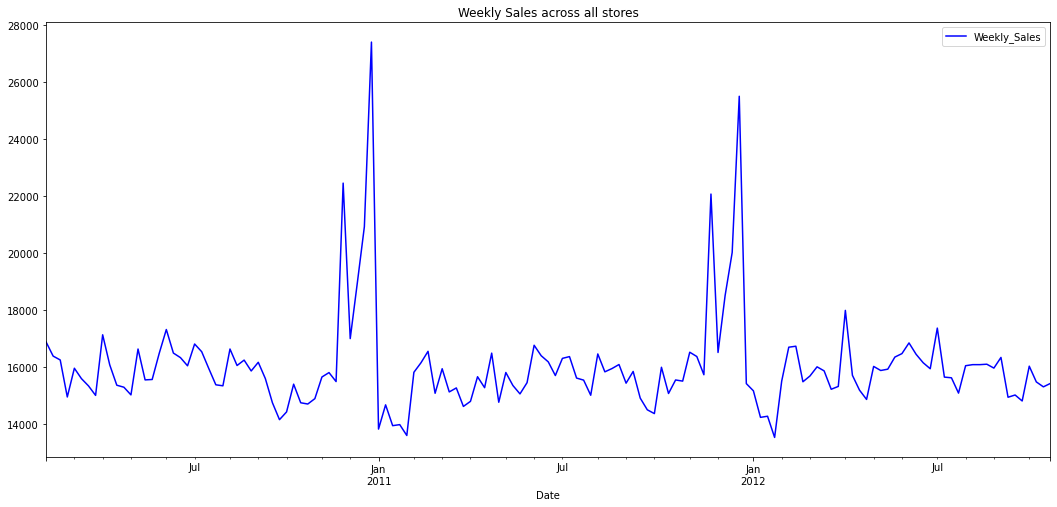

In [58]:
plot_time_series(avg_weekly_sales,title='Weekly Sales across all stores')

To visualize monthly data downsmaple this weekly data into monthly by taking mean. 

In [61]:
avg_monthly_sales=avg_weekly_sales.resample('M').mean()

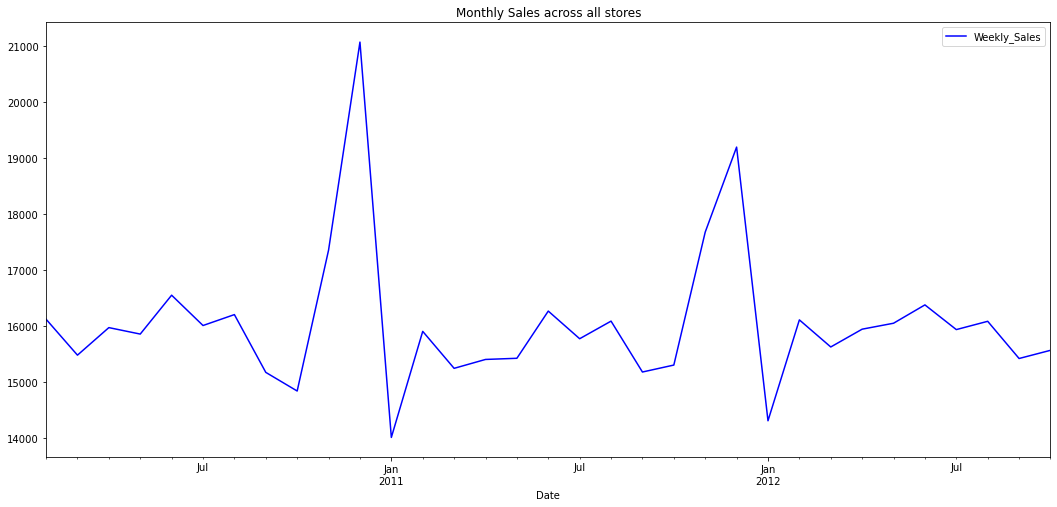

In [62]:
plot_time_series(avg_monthly_sales,title='Monthly Sales across all stores')

### Decomposing Average Weekly Data into Trend, Seasonality and Random Effect

For decomposing time series 2 methods can be used. either decompose() from pdarma module or seasonal_decompose from statsmodel.tsa.seasonal module

+ Additive Model: It is useful when the seasonal variation is constsnt over time. Here changes over time are consistently made by same amount.
    - A linear trend is a straight line
    - A linear seasonality has the same frequency (widh of cycles) and amplitude (height of cycles)
    Observation=Trend+Seasonality+Error
    
+ Multiplicative Model: It is more practical in nature and is useful when there are some variations over time. Here changes increase or decrease over time. Multiplicative model is non linear (like quadratic or exponential)
    - A nonlinear trend is a curved line
    - A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time
    Observation= Trend * Seasonality * Error

In [72]:
decomposed=decompose(avg_weekly_sales['Weekly_Sales'].values,'multiplicative',m=20)

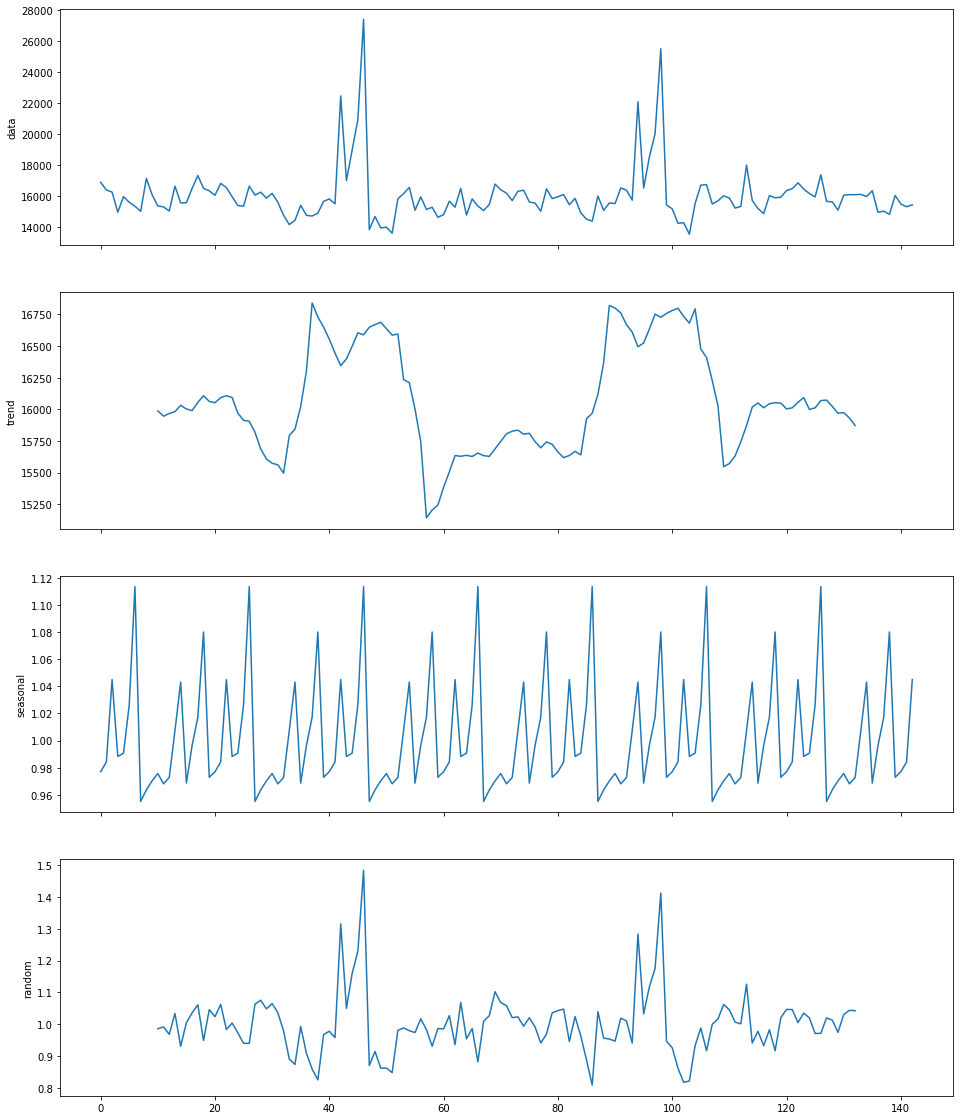

In [83]:
decomposed_plot(decomposed,figure_kwargs={'figsize':(16,20)})

In [84]:
decomposition=sm.tsa.seasonal_decompose(avg_weekly_sales,'multipliative')

In [85]:
# Create empty dataframe to store individual components
decomposed_data=pd.DataFrame()

# Extracting the trend component of time series
decomposed_data['trend']=decomposition.trend

# Extracting the seasonal component of time series
decomposed_data['seasonal']=decomposition.seasonal

# Extracting the white noise or residual component of time series
decomposed_data['random_noise']=decomposition.resid

<AxesSubplot:xlabel='Date'>

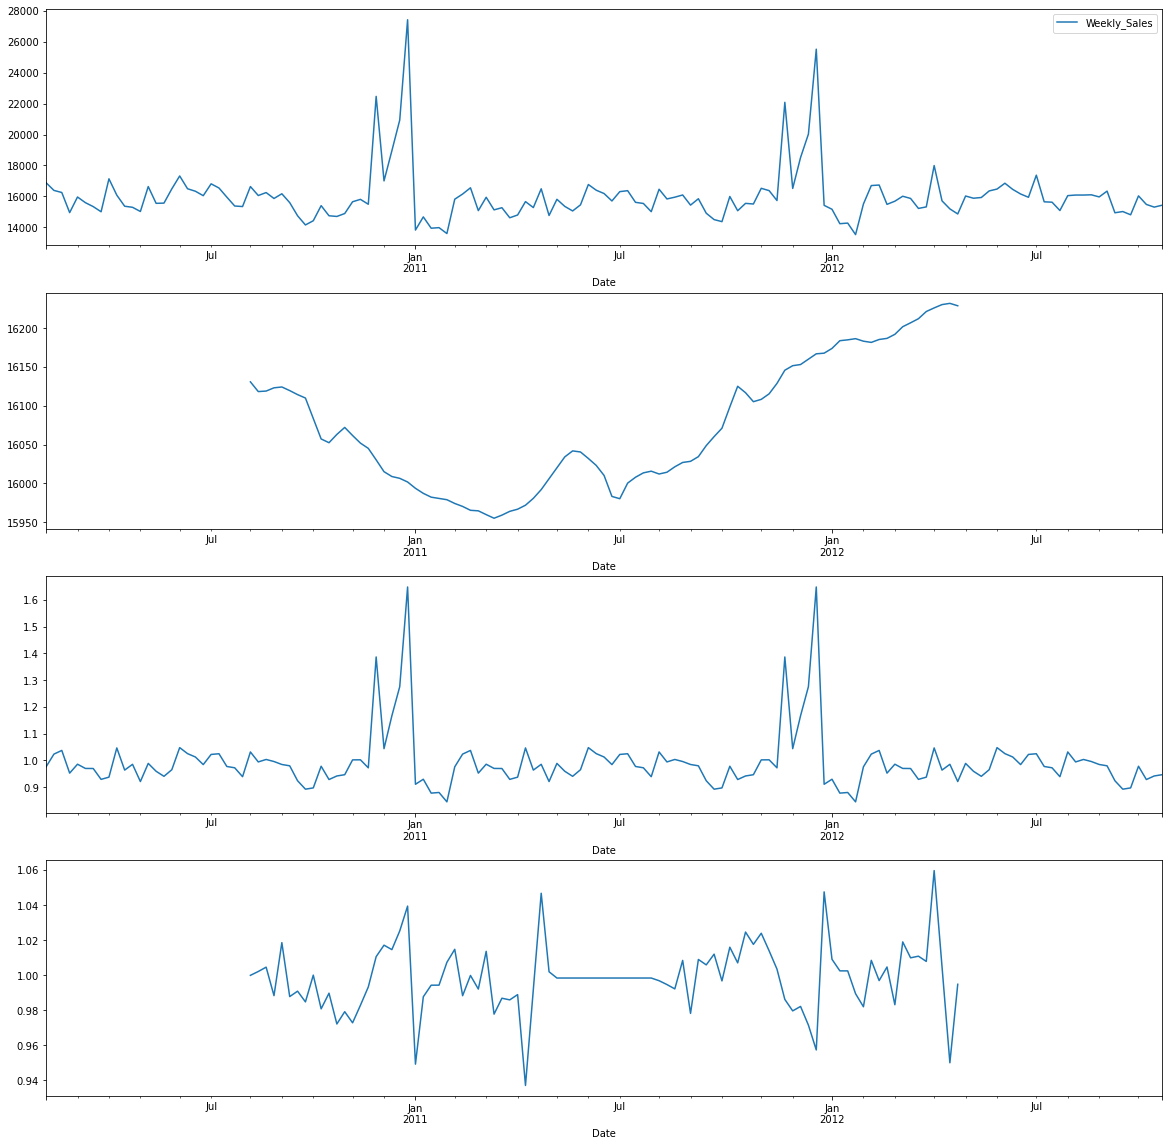

In [86]:
fig,(ax0,ax1,ax2,ax3)=plt.subplots(nrows=4,ncols=1,figsize=(20,20))
avg_weekly_sales.plot(ax=ax0)
decomposed_data['trend'].plot(ax=ax1)
decomposed_data['seasonal'].plot(ax=ax2)
decomposed_data['random_noise'].plot(ax=ax3)

+ Seasonality: Patterns of data are repeated over a fixed time period
+ Trend: The values of data increase or decrease over a predictable pattern
+ Cyclic: Values of data indicate increase and decrease but these fluctuations do not occur over a fixed time period.
+ Error: Errors are random effects which are not classified into any of the 3 categories & occur due to natural tendancy of data. Error terms are unpredictable, however, they can be used for prediction like Moving Averag model does.

### Checking for Stationarity

+ Augmented Dicky-Fuller (ADF) Test is one of the ways to check whether data is stationary or not

It is important to check whether data time series data is stationary or not. If it is not stationary, then we need to make it stationary by taking difference. The number of times we take a difference of data until it becomes stationary is a parameter used in ARIMA model.

When is a time series stationary?

+ A time series is said to be stationary if it has no trend, and displays constant variance over time. It has a constant autocorrelation structure over time

Why to remove non-stationarity?

Non-stationary time series may be due to one of the below reasons:
+ Presence of trend in data
+ Presence od heteroskedasticity
+ Presence of Autocorrelation

Null Hypothesis: The time series is non stationary | Data has a unit root    (p>0.05)

Alternative Hypothesis: The time series is stationary | Data does not have a unit root (p<0.05)

In [114]:
def check_stationary(df):
    result=adfuller(df)
    print('ADF Test Statistic: %f'% result[0])
    print('p-value %f' % result[1])
    print('Signicance Level & Critical Values: ')
    for key,value in result[4].items():
        print('\t%s: %.3f' %(key,value))

In [115]:
check_stationary(avg_weekly_sales)

ADF Test Statistic: -5.927107
p-value 0.000000
Signicance Level & Critical Values: 
	1%: -3.479
	5%: -2.883
	10%: -2.578


+ Test statistic value (-5) is smaller than the value (-3.479) at significance level of 1% (i.e. a low probability that this result is a statistical fluke)

#### Splitting data into train & test

In [90]:
avg_weekly_sales.head()

,Weekly_Sales
Date,
2010-02-06,16887.602166
2010-02-13,16390.912208
2010-02-20,16255.185970
2010-02-27,14955.932194
2010-03-06,15964.821240


### Converting Non-Stationary Time series into Stationary

#### ------ Do this at a latter stage. After Making the TS stationary------

In [96]:
# Splitting first 70% of the data into train set and remaining 30% into test set
train_df=avg_weekly_sales[:int(0.7*len(avg_weekly_sales))]
test_df=avg_weekly_sales[int(0.7*len(avg_weekly_sales)):]

print('Train data shape: ',train_df.shape)
print('Test data shape: ',test_df.shape)

Train data shape:  (100, 1)
Test data shape:  (43, 1)


In [97]:
train_df.head()

,Weekly_Sales
Date,
2010-02-06,16887.602166
2010-02-13,16390.912208
2010-02-20,16255.185970
2010-02-27,14955.932194
2010-03-06,15964.821240


In [95]:
test_df.head()

,Weekly_Sales
Date,
2012-01-07,15172.381502
2012-01-14,14240.431552
2012-01-21,14279.630241
2012-01-28,13535.547791
2012-02-04,15511.884823


In [99]:
avg_weekly_sales.columns.to_list()

['Weekly_Sales']

### Visualize train & test data in same plot

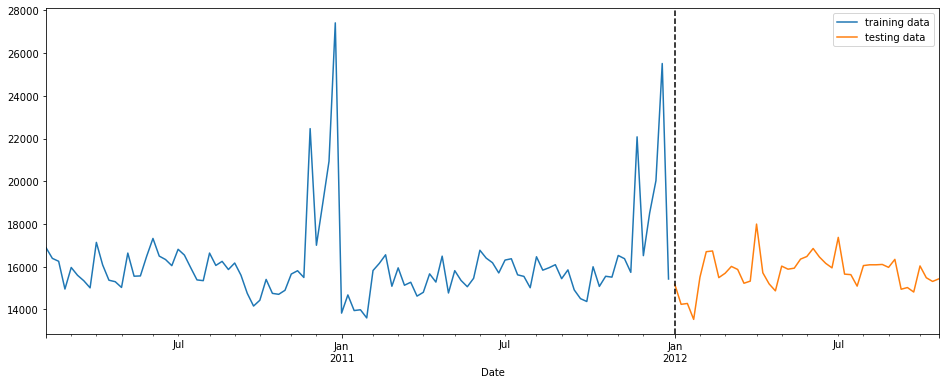

In [101]:
# Creating plots for train & test data

fig,ax=plt.subplots(figsize=(16,6))

# Plot training data
train_df.plot(ax=ax)

# Plot testing data
test_df.plot(ax=ax)

# Ading legends 
plt.legend(['training data','testing data'])

# Segregating training & testing data
plt.axvline(x='2012-01-07',color='black',linestyle='--')

# Showing plot
plt.show()

Note: Check if entire time series is non-stationary, but training time series is stationary

References

- https://medium.com/vitrox-publication/what-is-a-time-series-forecasting-d020d657f11a#:~:text=Seasonal%20%2D%3E%20The%20patterns%20of%20the,often%20due%20to%20economic%20conditions.

- https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

- ADF Test: https://machinelearningmastery.com/time-series-data-stationary-python/
